In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# 读取上证指数的数据
index_data = pd.read_excel('./stock_data/日度数据/000001_index/000001RESSET_IDXQTTN_1.xls', encoding='GB2312', usecols=[1, 5])
index_data

,交易日期_TrdDt,收盘价(元/点)_ClPr
0,2000-01-04,1406.3710
1,2000-01-05,1409.6820
2,2000-01-06,1463.9420
3,2000-01-07,1516.6040
4,2000-01-10,1545.1120
5,2000-01-11,1479.7810
6,2000-01-12,1438.0200
7,2000-01-13,1424.4420
8,2000-01-14,1408.8480
9,2000-01-17,1433.3300


In [3]:
#修改列的名称
index_data.columns = ['date', 'close']
index_data

,date,close
0,2000-01-04,1406.3710
1,2000-01-05,1409.6820
2,2000-01-06,1463.9420
3,2000-01-07,1516.6040
4,2000-01-10,1545.1120
5,2000-01-11,1479.7810
6,2000-01-12,1438.0200
7,2000-01-13,1424.4420
8,2000-01-14,1408.8480
9,2000-01-17,1433.3300


In [4]:
#去除数据中的nan值
index_data.dropna(inplace=True)
index_data

,date,close
0,2000-01-04,1406.3710
1,2000-01-05,1409.6820
2,2000-01-06,1463.9420
3,2000-01-07,1516.6040
4,2000-01-10,1545.1120
5,2000-01-11,1479.7810
6,2000-01-12,1438.0200
7,2000-01-13,1424.4420
8,2000-01-14,1408.8480
9,2000-01-17,1433.3300


In [5]:
#计算上证指数每日的对数收益率
index_data['return'] = np.log(index_data['close']) - np.log(index_data['close'].shift(periods=1))
index_data

,date,close,return
0,2000-01-04,1406.3710,NaN
1,2000-01-05,1409.6820,0.002352
2,2000-01-06,1463.9420,0.037769
3,2000-01-07,1516.6040,0.035341
4,2000-01-10,1545.1120,0.018623
5,2000-01-11,1479.7810,-0.043202
6,2000-01-12,1438.0200,-0.028627
7,2000-01-13,1424.4420,-0.009487
8,2000-01-14,1408.8480,-0.011008
9,2000-01-17,1433.3300,0.017228


In [6]:
#去除收益率为NAN的值
index_data.dropna(inplace=True)
index_data

,date,close,return
1,2000-01-05,1409.6820,0.002352
2,2000-01-06,1463.9420,0.037769
3,2000-01-07,1516.6040,0.035341
4,2000-01-10,1545.1120,0.018623
5,2000-01-11,1479.7810,-0.043202
6,2000-01-12,1438.0200,-0.028627
7,2000-01-13,1424.4420,-0.009487
8,2000-01-14,1408.8480,-0.011008
9,2000-01-17,1433.3300,0.017228
10,2000-01-18,1426.6230,-0.004690


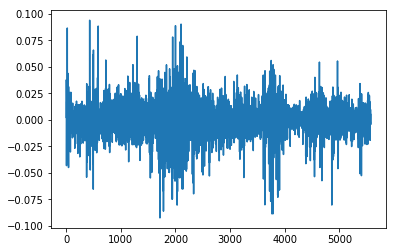

In [7]:
#上证指数收益率序列画图
index_data['return'].plot()

In [8]:
#读取股票的数据
stock_data600000 = pd.read_excel('./stock_data/日度数据/600000/600000stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_data600000

,日期_Date,收盘价_Clpr,日无风险收益率_DRfRet
0,2000-01-04,25.57,0.000054
1,2000-01-05,25.28,0.000054
2,2000-01-06,25.99,0.000054
3,2000-01-07,26.90,0.000054
4,2000-01-10,27.25,0.000054
5,2000-01-11,26.20,0.000054
6,2000-01-12,25.12,0.000054
7,2000-01-13,24.90,0.000054
8,2000-01-14,24.20,0.000054
9,2000-01-17,24.40,0.000054


In [9]:
#修改列名  日期，收盘价，无风险收益率
stock_data600000.columns = ['date', 'close', 'rfreturn']
stock_data600000

,date,close,rfreturn
0,2000-01-04,25.57,0.000054
1,2000-01-05,25.28,0.000054
2,2000-01-06,25.99,0.000054
3,2000-01-07,26.90,0.000054
4,2000-01-10,27.25,0.000054
5,2000-01-11,26.20,0.000054
6,2000-01-12,25.12,0.000054
7,2000-01-13,24.90,0.000054
8,2000-01-14,24.20,0.000054
9,2000-01-17,24.40,0.000054


In [10]:
# 去除股票数据中的NAN值
stock_data600000.dropna(inplace=True)
stock_data600000

,date,close,rfreturn
0,2000-01-04,25.57,0.000054
1,2000-01-05,25.28,0.000054
2,2000-01-06,25.99,0.000054
3,2000-01-07,26.90,0.000054
4,2000-01-10,27.25,0.000054
5,2000-01-11,26.20,0.000054
6,2000-01-12,25.12,0.000054
7,2000-01-13,24.90,0.000054
8,2000-01-14,24.20,0.000054
9,2000-01-17,24.40,0.000054


In [12]:
# 计算股票的收益率
stock_data600000['return'] = np.log(stock_data600000['close']) - np.log(stock_data600000['close'].shift(periods=1))
stock_data600000

,date,close,rfreturn,return
0,2000-01-04,25.57,0.000054,NaN
1,2000-01-05,25.28,0.000054,-0.011406
2,2000-01-06,25.99,0.000054,0.027698
3,2000-01-07,26.90,0.000054,0.034414
4,2000-01-10,27.25,0.000054,0.012927
5,2000-01-11,26.20,0.000054,-0.039294
6,2000-01-12,25.12,0.000054,-0.042095
7,2000-01-13,24.90,0.000054,-0.008797
8,2000-01-14,24.20,0.000054,-0.028515
9,2000-01-17,24.40,0.000054,0.008230


In [13]:
# 去除NAN值
stock_data600000.dropna(inplace=True)
stock_data600000

,date,close,rfreturn,return
1,2000-01-05,25.28,0.000054,-0.011406
2,2000-01-06,25.99,0.000054,0.027698
3,2000-01-07,26.90,0.000054,0.034414
4,2000-01-10,27.25,0.000054,0.012927
5,2000-01-11,26.20,0.000054,-0.039294
6,2000-01-12,25.12,0.000054,-0.042095
7,2000-01-13,24.90,0.000054,-0.008797
8,2000-01-14,24.20,0.000054,-0.028515
9,2000-01-17,24.40,0.000054,0.008230
10,2000-01-18,24.14,0.000054,-0.010713


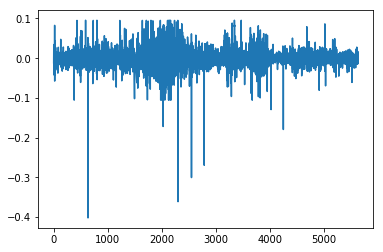

In [15]:
#画出股票收益率序列
stock_data600000['return'].plot()

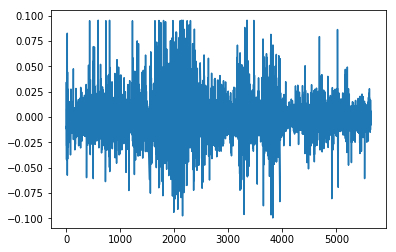

In [16]:
# 收益率应该在-0.1-0.1之间，去除掉异常数据
ind = (stock_data600000['return'] >= -0.1) & (stock_data600000['return'] <= 0.1)
stock_data600000 = stock_data600000.loc[ind, :]
stock_data600000['return'].plot()

In [17]:
# 拼接股票数据和上证指数数据
# how='inner'参数意味着执行的是内连接（inner join），即只保留两个数据框中都有的日期的数据
merge_data = pd.merge(left=stock_data600000[['date', 'return', 'rfreturn']],
                     right=index_data[['date', 'return']],
                     on='date',
                     how='inner')
merge_data

,date,return_x,rfreturn,return_y
0,2000-01-05,-0.011406,0.000054,0.002352
1,2000-01-06,0.027698,0.000054,0.037769
2,2000-01-07,0.034414,0.000054,0.035341
3,2000-01-10,0.012927,0.000054,0.018623
4,2000-01-11,-0.039294,0.000054,-0.043202
5,2000-01-12,-0.042095,0.000054,-0.028627
6,2000-01-13,-0.008797,0.000054,-0.009487
7,2000-01-14,-0.028515,0.000054,-0.011008
8,2000-01-17,0.008230,0.000054,0.017228
9,2000-01-18,-0.010713,0.000054,-0.004690


In [18]:
merge_data.columns = ['date', 'return_stk600000', 'rfreturn', 'return_ind']
merge_data

,date,return_stk600000,rfreturn,return_ind
0,2000-01-05,-0.011406,0.000054,0.002352
1,2000-01-06,0.027698,0.000054,0.037769
2,2000-01-07,0.034414,0.000054,0.035341
3,2000-01-10,0.012927,0.000054,0.018623
4,2000-01-11,-0.039294,0.000054,-0.043202
5,2000-01-12,-0.042095,0.000054,-0.028627
6,2000-01-13,-0.008797,0.000054,-0.009487
7,2000-01-14,-0.028515,0.000054,-0.011008
8,2000-01-17,0.008230,0.000054,0.017228
9,2000-01-18,-0.010713,0.000054,-0.004690


In [19]:
stk_ret = merge_data['return_stk600000'].values
rf_ret = merge_data['rfreturn'].values
ind_ret = merge_data['return_ind'].values

Text(0,0.5,'$r_i-r_f$')

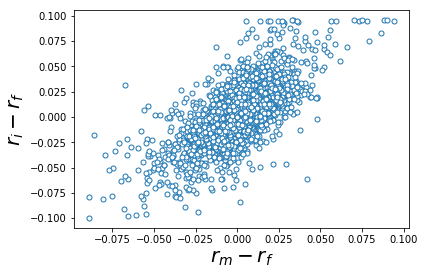

In [20]:
# 股票超额收益率和市场超额收益率散点图
plt.plot(ind_ret - rf_ret, stk_ret - rf_ret, 'o', ms=5, mfc='w', lw=2)
plt.xlabel(r'$r_m-r_f$', fontsize=20)
plt.ylabel(r'$r_i-r_f$', fontsize=20)

In [21]:
x = sm.add_constant(ind_ret-rf_ret)
y = stk_ret - rf_ret
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     4814.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:02:28   Log-Likelihood:                 15106.
No. Observations:                5438   AIC:                        -3.021e+04
Df Residuals:                    5436   BIC:                        -3.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.635      0.5

In [22]:
# 定义一个函数，快速进行数据处理和OLS回归分析
def DataOLS(stockData,indexData):
    merge_data = pd.merge(left=stockData[['date', 'return', 'rfreturn']],
                     right=indexData[['date', 'return']],
                     on='date',
                     how='inner')
    merge_data.columns = ['date', 'return_stk', 'rfreturn', 'return_ind']
    stk_ret = merge_data['return_stk'].values
    rf_ret = merge_data['rfreturn'].values
    ind_ret = merge_data['return_ind'].values
    x = sm.add_constant(ind_ret-rf_ret)
    y = stk_ret - rf_ret
    model = sm.OLS(y, x)
    results = model.fit()
    print(results.summary())

In [35]:
 # 定义一个股票数据清洗函数
def stockDataClean(stockData):
    #修改列名  日期，收盘价，无风险收益率
    stockData.columns = ['date', 'close', 'rfreturn']
    # 去除股票数据中的NAN值
    stockData.dropna(inplace=True)
    # 计算股票的收益率
    stockData['return'] = np.log(stockData['close']) - np.log(stockData['close'].shift(periods=1))
    # 去除NAN值
    stockData.dropna(inplace=True)
    # 收益率应该在-0.1-0.1之间，去除掉异常数据
    ind = (stockData['return'] >= -0.1) & (stockData['return'] <= 0.1)
    stockData = stockData.loc[ind, :]
    return stockData

In [37]:
# 000400股票数据
stock_000400 = pd.read_excel('./stock_data/日度数据/000400/000400stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_000400_pro = stockDataClean(stock_000400)
DataOLS(stock_000400_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     2280.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:26:17   Log-Likelihood:                 12260.
No. Observations:                5261   AIC:                        -2.452e+04
Df Residuals:                    5259   BIC:                        -2.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.290      0.1

In [38]:
# 000600股票数据
stock_000600 = pd.read_excel('./stock_data/日度数据/000600/000600stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_000600_pro = stockDataClean(stock_000600)
DataOLS(stock_000600_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     2871.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:27:49   Log-Likelihood:                 12710.
No. Observations:                5258   AIC:                        -2.542e+04
Df Residuals:                    5256   BIC:                        -2.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.962      0.3

In [39]:
# 000800股票数据
stock_000800 = pd.read_excel('./stock_data/日度数据/000800/000800stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_000800_pro = stockDataClean(stock_000800)
DataOLS(stock_000800_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     3156.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:28:59   Log-Likelihood:                 13119.
No. Observations:                5452   AIC:                        -2.623e+04
Df Residuals:                    5450   BIC:                        -2.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.992      0.3

In [40]:
# 000900股票数据
stock_000900 = pd.read_excel('./stock_data/日度数据/000900/000900stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_000900_pro = stockDataClean(stock_000900)
DataOLS(stock_000900_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4721.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:30:38   Log-Likelihood:                 14457.
No. Observations:                5297   AIC:                        -2.891e+04
Df Residuals:                    5295   BIC:                        -2.890e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.262      0.2

In [41]:
# 600000股票数据
stock_600000 = pd.read_excel('./stock_data/日度数据/600000/600000stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_600000_pro = stockDataClean(stock_600000)
DataOLS(stock_600000_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     4814.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:31:37   Log-Likelihood:                 15106.
No. Observations:                5438   AIC:                        -3.021e+04
Df Residuals:                    5436   BIC:                        -3.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.635      0.5

In [42]:
# 600100股票数据
stock_600100 = pd.read_excel('./stock_data/日度数据/600100/600100stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_600100_pro = stockDataClean(stock_600100)
DataOLS(stock_600100_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     3207.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:32:37   Log-Likelihood:                 12885.
No. Observations:                5297   AIC:                        -2.577e+04
Df Residuals:                    5295   BIC:                        -2.575e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.860      0.3

In [43]:
# 600200股票数据
stock_600200 = pd.read_excel('./stock_data/日度数据/600200/600200stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_600200_pro = stockDataClean(stock_600200)
DataOLS(stock_600200_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     1564.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.87e-300
Time:                        16:33:10   Log-Likelihood:                 12262.
No. Observations:                5355   AIC:                        -2.452e+04
Df Residuals:                    5353   BIC:                        -2.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.581      0.0

In [44]:
# 600600股票数据
stock_600600 = pd.read_excel('./stock_data/日度数据/600600/600600stock_data_2000_2022_combined.xls', encoding='GB2312', usecols=[1, 5, 10])
stock_600600_pro = stockDataClean(stock_600600)
DataOLS(stock_600600_pro,index_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     2495.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:52   Log-Likelihood:                 14105.
No. Observations:                5459   AIC:                        -2.821e+04
Df Residuals:                    5457   BIC:                        -2.819e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.855      0.0